In [103]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [104]:
# 데이터 로드
# Kaggle에서 제공하는 "Mall_Customers.csv" 파일을 다운로드하고 같은 디렉토리에 저장하세요.
data = pd.read_csv('Mall_Customers.csv')

In [105]:
# 데이터 정규화
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [106]:
# K-Means 클러스터링 모델 생성
# k를 5로 설정하고 이후 적절한 k값 도출
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [107]:
data['Cluster'] = kmeans.labels_

In [108]:
# 5. 각 클러스터의 기초 통계값 확인
cluster_stats = data.groupby('Cluster').describe()
print(cluster_stats)

        CustomerID                                                            \
             count        mean        std    min    25%    50%    75%    max   
Cluster                                                                        
0             81.0   86.320988  24.240889   44.0   66.0   86.0  106.0  143.0   
1             39.0  162.000000  22.803509  124.0  143.0  162.0  181.0  200.0   
2             22.0   23.090909  13.147185    2.0   12.5   23.0   33.5   46.0   
3             35.0  164.371429  21.457325  125.0  148.0  165.0  182.0  199.0   
4             23.0   23.000000  13.564660    1.0   12.0   23.0   34.0   45.0   

          Age             ... Annual Income (k$)         \
        count       mean  ...                75%    max   
Cluster                   ...                             
0        81.0  42.716049  ...              62.00   76.0   
1        39.0  32.692308  ...              95.00  137.0   
2        22.0  25.272727  ...              32.25   39.0   
3    

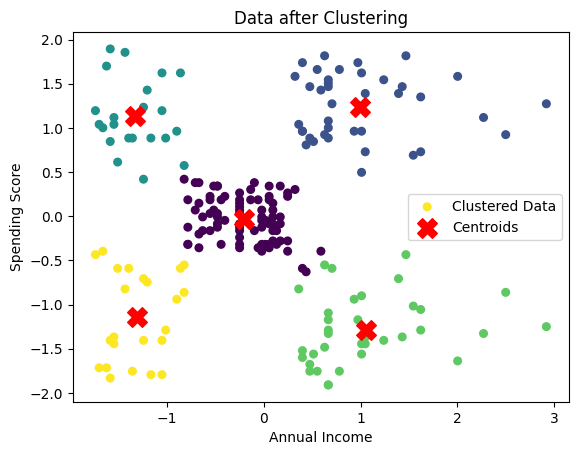

In [109]:
#  군집화 결과 시각화
# 각 데이터 포인트의 클러스터에 따라 색을 지정
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis', s=30, label="Clustered Data")

# 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()
